In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Standard Least Square Regrassion Method - by hand

## Prepare the data

In [2]:
x = np.array([1,2,2,3,3,4])
y = np.array([1,2,6,1,7,9])

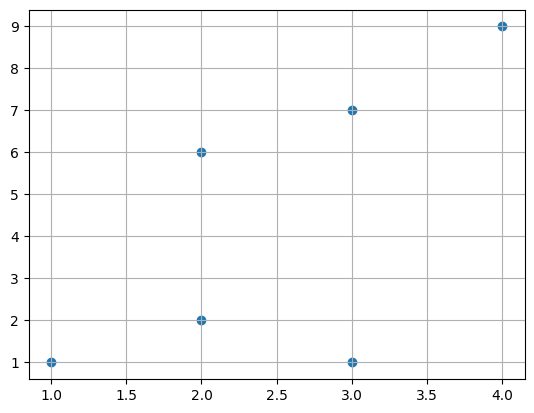

In [3]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.grid()

## Fit the model

### Calculate Slope

In [4]:
### calculate mean and sample standard deviations
x_mean = x.mean()
y_mean = y.mean()

# use ddof=1 to calculate sample std, not population, which is deafult
x_std = x.std(ddof=1).round(3)
y_std = y.std(ddof=1).round(3)

### calculate correlation coeficient:
r_mat = np.corrcoef([x,y])
r = r_mat[0,1].round(3)

### calculate m:
m = r*(y_std/x_std)
m = m

print(f'x_mean={x_mean}; y_mean={y_mean}')
print(f'x_std={x_std}; y_std={y_std}')
print(f'r={r}')
print(f'm={m}')

x_mean=2.5; y_mean=4.333333333333333
x_std=1.049; y_std=3.445
r=0.664
m=2.1806291706387038


### Calculate Intercept

In [5]:
b = y_mean-x_mean*m
print(f'b= {b}')

b= -1.118239593263426


In [6]:
# y = 2.69*x - 1.46

# Standard Least Square Regrassion Method - by sklearn

In [7]:
x.shape

(6,)

In [8]:
### prepare data
x_sk = x.reshape(-1, 1)
y_sk = y

### fit the estimator:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_sk, y_sk)

### get m (coeficient) and b (intercept)
m_sk = reg.coef_[0]
b_sk = reg.intercept_

# Compare results

In [9]:
print(f'm={m}')
print(f'b={b}')
print(f'm_sk={m_sk}')
print(f'b_sk={b_sk}')

m=2.1806291706387038
b=-1.118239593263426
m_sk=2.181818181818181
b_sk=-1.1212121212121202


# Visualize

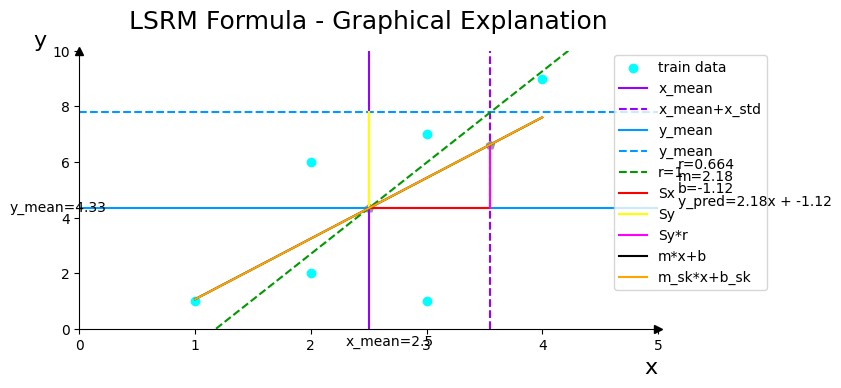

In [10]:
fig, ax = plt.subplots(figsize=(8,4))

# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# set axis limits:
x_max = abs(x.max())
y_max = abs(y.max())
# ax.set_xlim(-1, x_max)
# ax.set_ylim(-1, y_max)
ax.set_xlim(0,x_max+1)
ax.set_ylim(0,y_max+1)

# plot data
ax.scatter(x=x, y=y, c='#0FF', label="train data")

# plot X_mean lines
ax.axvline(x_mean, c="#90F", label="x_mean")
ax.axvline(x_mean+x_std, c="#90F", linestyle="--",label="x_mean+x_std")

# plot Y_mean lines
ax.axhline(y_mean, c="#09F", label="y_mean")
ax.axhline(y_mean+y_std, c="#09F", linestyle="--", label="y_mean")

# plot line when r=1, i.e. m = Sy/Sx,
ax.axline((x_mean, y_mean), (x_mean+x_std, y_mean+y_std), linestyle='--', c="#090", label="r=1")

# plot Sx, Sy and Sy*r
ax.plot((x_mean, x_mean+x_std),(y_mean,y_mean), color="#F00", label="Sx")
ax.plot((x_mean, x_mean),(y_mean,y_mean+y_std), color="#FF0", label="Sy")
ax.plot((x_mean+x_std, x_mean+x_std),(y_mean,(y_mean+y_std*r)), color="#F0F", label="Sy*r")

# plot points for (x_mean,y_mean),(x_mean+x_std, y_mean+y_std*r)
ax.scatter(x_mean, y_mean, marker='p', c="#999")
ax.scatter(x_mean+x_std, y_mean+y_std*r, marker='p', c="#999")

# plot line y = m*x+b
ax.plot(x, m*x+b, c="#000", linestyle="-", label=f"m*x+b")
# plit line y_sk = m_sk*x + b_sk
ax.plot(x, m_sk*x+b_sk, c="orange", linestyle="-", label=f"m_sk*x+b_sk")


# set aux text:
ax.text(x_mean-0.2, -0.6, f'x_mean={round(x_mean,2)}')
ax.text(-0.6, y_mean-0.1, f'y_mean={round(y_mean,2)}')

fig.text(0.86, 0.56, f'r={r}')
fig.text(0.86, 0.53, f'm={m.round(2)}')
fig.text(0.86, 0.50, f'b={b.round(2)}' )
fig.text(0.86, 0.47, f'y_pred={m.round(2)}x + {b.round(2)}')

# ax.grid()
ax.set_xlabel('x', loc='right', fontsize=16)
ax.set_ylabel('y', loc='top', rotation=0, fontsize=16)
ax.set_title('LSRM Formula - Graphical Explanation', fontsize=18, y=1.05)
ax.legend(loc='upper right',  bbox_to_anchor=(1.2, 1.01))
fig.tight_layout()

# Error Metrics

In [11]:
x_test = np.array([1,3,2,3]).reshape(-1,1)
y_test = np.array([2,3,6,1])

In [12]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = reg.predict(x_test)
print(f'y_test: {y_test}')
print(f'y_pred: {y_pred.round(0).astype(np.int_)}')
# print(f'accuracy_score: {reg.accuracy_score(x_test,y_test)}')

y_test: [2 3 6 1]
y_pred: [1 5 3 5]


Mean Absolute Error (MAE) 

## HW: Calculate by hand (numpy)

In [17]:
# diffs = y_test - y_pred

mae_np = np.mean(np.abs((y_test - y_pred)))
mae_np

2.636363636363636

## Calculate by sklearn

In [14]:
from sklearn.metrics import mean_absolute_error,r2_score
mae_sk = mean_absolute_error(y_test, y_pred)
# print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print(f'Mean absolute error:{mae_sk} ')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean absolute error:2.636363636363636 
Coefficient of determination: -1.42
